In [61]:
%pip install spacy
%python -m spacy download en_core_web_sm
%python -m spacy download en
%pip install en_core_web_sm-3.1.0-py3-none-any.whl

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [62]:


!pip install beautifulsoup4
%pip install textblob
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Note: you may need to restart the kernel to use updated packages.


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\pares\appdata\local\temp\pip-req-build-8izk20l9
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7676 sha256=7e23e7744b6167da0ab97672b01fd891b39236712a72470c86d488f630fa9b53
  Stored in directory: C:\Users\pares\AppData\Local\Temp\pip-ephem-wheel-cache-_agf16hq\wheels\d1\c3\bb\559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\pares\AppData\Local\Temp\pip-req-build-8izk20l9'
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [63]:
import re
import os
import sys
import json

import pandas as pd
import numpy as np
import spacy
import textblob
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup
import unicodedata
from textblob import TextBlob
import en_core_web_sm

In [64]:
import warnings 

In [65]:
warnings.filterwarnings('ignore')
import pandas as pd

In [66]:
df = pd.read_csv('twitter_sentiment.csv',header =None,index_col=0)

In [67]:
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [68]:
df = df[[2,3]].reset_index(drop = True)

 

In [69]:
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [71]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)
print(df.shape)

df = df[df['text'].apply(len)>5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
(74996, 2)


In [72]:
print(df.shape)

(72883, 2)


In [73]:
df['text'].apply(len)

0         53
1         51
2         50
3         51
4         57
        ... 
75677    281
75678    248
75679    120
75680     49
75681    116
Name: text, Length: 72883, dtype: int64

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
nlp = en_core_web_sm.load()



In [17]:
 def _get_wordcounts(x):
	length = len(str(x).split())
	return length

def _get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)

def _get_avg_wordlength(x):
	count = _get_charcounts(x)/_get_wordcounts(x)
	return count

def _get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l

In [18]:
def _get_hashtag_counts(x):
	l = len([t for t in x.split() if t.startswith('#')])
	return l

def _get_mentions_counts(x):
	l = len([t for t in x.split() if t.startswith('@')])
	return l

def _get_digit_counts(x):
	digits = re.findall(r'[0-9,.]+', x)
	return len(digits)

def _get_uppercase_counts(x):
	return len([t for t in x.split() if t.isupper()])

def _cont_exp(x):
	abbreviations = json.load(open(abbreviations_path))

	if type(x) is str:
		for key in abbreviations:
			value = abbreviations[key]
			raw_text = r'\b' + key + r'\b'
			x = re.sub(raw_text, value, x)
			# print(raw_text,value, x)
		return x
	else:
		return x

In [19]:
def _get_emails(x):
	emails = re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x)
	counts = len(emails)

	return counts, emails


def _remove_emails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

def _get_urls(x):
	urls = re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)
	counts = len(urls)

	return counts, urls

def _remove_urls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def _remove_rt(x):
	return re.sub(r'\brt\b', '', x).strip()

def _remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

def _remove_html_tags(x):
    
	return BeautifulSoup(x, 'lxml').get_text().strip()

def _remove_accented_chars(x):
	x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
	return x

def _remove_stopwords(x):
	return ' '.join([t for t in x.split() if t not in stopwords])	

In [20]:
def _make_base(x):
	x = str(x)
	x_list = []
	doc = nlp(x)
	
	for token in doc:
		lemma = token.lemma_
		if lemma == '-PRON-' or lemma == 'be':
			lemma = token.text

		x_list.append(lemma)
	return ' '.join(x_list)

In [21]:
def _get_value_counts(df, col):
	text = ' '.join(df[col])
	text = text.split()
	freq = pd.Series(text).value_counts()
	return freq


In [22]:
def _remove_common_words(x, freq, n=20):
	fn = freq[:n]
	x = ' '.join([t for t in x.split() if t not in fn])
	return x


In [23]:
def _remove_rarewords(x, freq, n=20):
	fn = freq.tail(n)
	x = ' '.join([t for t in x.split() if t not in fn])
	return x

def _remove_dups_char(x):
	x = re.sub("(.)\\1{2,}", "\\1", x)
	return x

def _spelling_correction(x):
	x = TextBlob(x).correct()
	return x


In [24]:
def _get_basic_features(df):
	if type(df) == pd.core.frame.DataFrame:
		df['char_counts'] = df['text'].apply(lambda x: _get_charcounts(x))
		df['word_counts'] = df['text'].apply(lambda x: _get_wordcounts(x))
		df['avg_wordlength'] = df['text'].apply(lambda x: _get_avg_wordlength(x))
		df['stopwords_counts'] = df['text'].apply(lambda x: _get_stopwords_counts(x))
		df['hashtag_counts'] = df['text'].apply(lambda x: _get_hashtag_counts(x))
		df['mentions_counts'] = df['text'].apply(lambda x: _get_mentions_counts(x))
		df['digits_counts'] = df['text'].apply(lambda x: _get_digit_counts(x))
		df['uppercase_counts'] = df['text'].apply(lambda x: _get_uppercase_counts(x))
	else:
		print('ERROR: This function takes only Pandas DataFrame')
		
	return df

In [25]:
def _get_ngram(df, col, ngram_range):
	vectorizer = CountVectorizer(ngram_range=(ngram_range, ngram_range))
	vectorizer.fit_transform(df[col])
	ngram = vectorizer.vocabulary_
	ngram = sorted(ngram.items(), key = lambda x: x[1], reverse=True)

	return ngram

In [26]:
df= _get_basic_features(df)

In [27]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

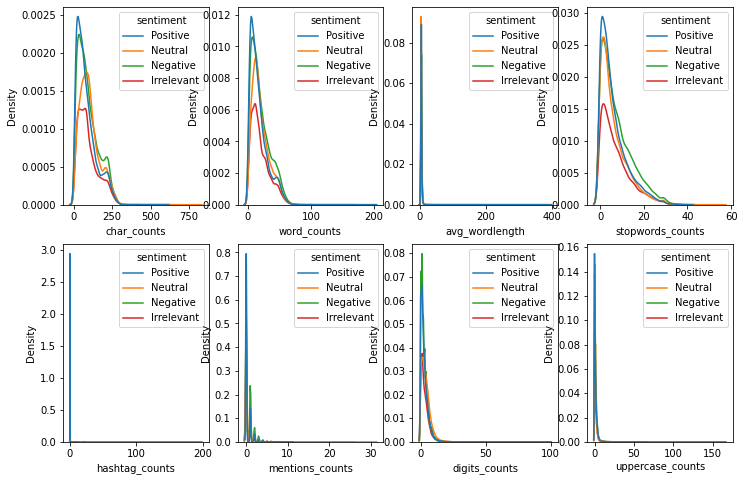

In [29]:
plt.figure(figsize=(12,8))
num_cols = df.select_dtypes(include='number').columns
# print (num_cols)

for index, cols in enumerate(num_cols):
    plt.subplot(2,4,index+1)
    sns.kdeplot(data=df,x=cols, hue = 'sentiment',fill=False)
plt.tight_layout
plt.show()
    

<AxesSubplot:ylabel='sentiment'>

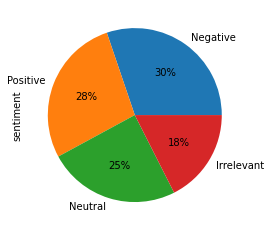

In [30]:
df['sentiment'].value_counts().plot(kind ='pie',autopct ='%1.0f%%')

In [31]:
#wordcloud visualisation
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
stopwords = set(STOPWORDS)

In [33]:
print(stopwords)

{'there', 'no', 'he', 'com', 'and', 'themselves', 'i', 'hers', 'but', 'having', "we'd", 'an', 'why', 'with', 'would', 'cannot', 'is', 'than', "what's", 'in', 'before', 'other', "shouldn't", 'where', 'against', 'am', "we've", "doesn't", "he's", 'at', 'these', 'theirs', "i'll", 'have', "i'd", "they'll", 'been', "she'd", 'yourself', 'during', "couldn't", 'such', 'do', 'down', 'own', 'so', "mustn't", "we'll", 'hence', "isn't", 'above', "why's", 'get', 'few', 'http', 'it', 'how', 'ours', 'did', 'k', "hasn't", 'on', 'of', "wouldn't", 'them', "wasn't", 'a', 'for', 'they', 'then', "they've", 'just', 'be', 'very', 'she', "where's", 'which', 'the', 'when', 'until', 'we', "you've", "who's", "let's", 'while', 'are', "you'd", 'about', 'otherwise', 'under', 'their', 'out', 'my', 'below', "don't", 'has', 'however', 'r', "here's", 'doing', "won't", "you'll", 'here', 'being', 'once', 'same', "you're", 'whom', 'some', 'you', 'too', 'can', "she's", 'your', 'by', 'else', 'that', "he'll", 'ever', 'his', 'h

ValueError: Only supported for TrueType fonts

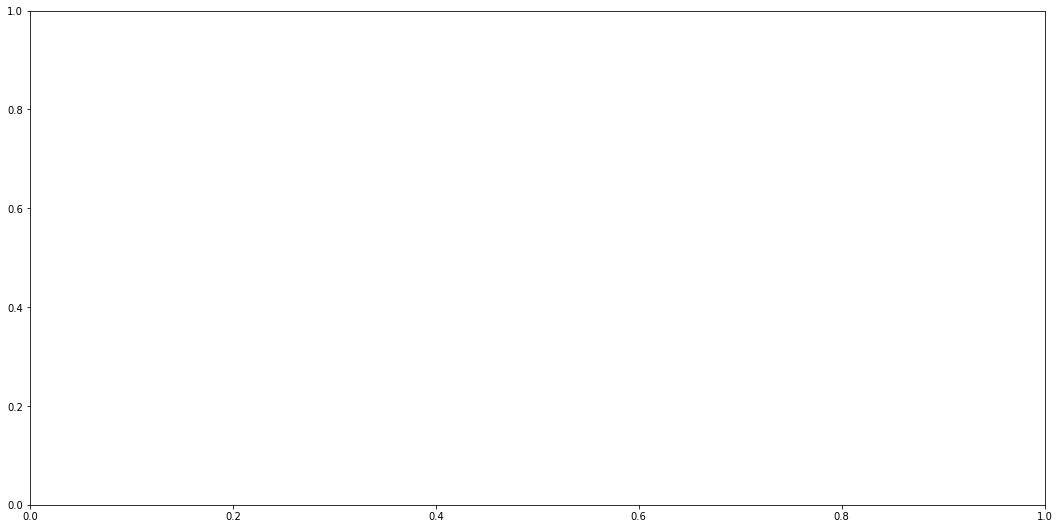

In [34]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [ ]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: _remove_urls(x))


In [35]:

df['text'] = df['text'].apply(lambda x: _remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: _remove_rt(x))

In [36]:
 
%pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [38]:
df['text'] = df['text'].apply(lambda x: _remove_html_tags(x))

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['sentiment'],test_size=0.2, random_state=0)

In [41]:
X_train.shape, X_test.shape

((58306,), (14577,))

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline




In [45]:
clf = Pipeline([('tfid',TfidfVectorizer() ), ('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [46]:
from sklearn.metrics import classification_report 


In [47]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2561
    Negative       0.91      0.96      0.93      4481
     Neutral       0.92      0.91      0.92      3553
    Positive       0.90      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.91      0.92     14577
weighted avg       0.92      0.92      0.92     14577



In [48]:
import pickle
pickle.dump(clf,open("twitter_sentiment.pkl", 'wb'))

In [60]:
 clf.predict([''])

array(['Negative'], dtype=object)